**1. kD Tree**

In [ ]:
import numpy as np

class KDTree:
    def __init__(self, matrix):
        # Assume matrix is a NumPy array where each row is a data point with 2 features
        self.tree = self.build_tree(matrix, depth=0)

    def build_tree(self, matrix, depth):
        # If the matrix is empty, return None (this is a leaf node)
        if len(matrix) == 0:
            return None

        # Alternate between splitting on x (axis=0) and y (axis=1)
        axis = depth % 2

        # Sort matrix by the axis and find the median index
        sorted_matrix = matrix[matrix[:, axis].argsort()]
        median_idx = len(sorted_matrix) // 2

        # Create a node with the median point, and recursively build subtrees
        return {
            'point': sorted_matrix[median_idx],
            'left': self.build_tree(sorted_matrix[:median_idx], depth + 1),
            'right': self.build_tree(sorted_matrix[median_idx + 1:], depth + 1)
        }

    def find_nearest(self, vector):
        # Traverse the tree to find the nearest neighbor
        return self._find_nearest(self.tree, vector, depth=0)

    def _find_nearest(self, node, vector, depth):
        if node is None:
            return None, float('inf')  # No neighbor, infinite distance

        axis = depth % 2

        # Determine which side of the node to search
        next_branch = None
        opposite_branch = None

        if vector[axis] < node['point'][axis]:
            next_branch = node['left']
            opposite_branch = node['right']
        else:
            next_branch = node['right']
            opposite_branch = node['left']

        # Search in the best branch first
        best_point, best_dist = self._find_nearest(next_branch, vector, depth + 1)

        # Compute the distance to the current node
        dist_to_node = np.linalg.norm(vector - node['point'])

        # Update best point if the current node is closer
        if dist_to_node < best_dist:
            best_point = node['point']
            best_dist = dist_to_node

        # Check if we need to search the other branch
        if abs(vector[axis] - node['point'][axis]) < best_dist:
            potential_point, potential_dist = self._find_nearest(opposite_branch, vector, depth + 1)
            if potential_dist < best_dist:
                best_point = potential_point
                best_dist = potential_dist

        return best_point, best_dist


In [ ]:
import numpy as np

# Example dataset: 10 random 2D points
data = np.random.rand(10, 2) * 10  # Random points between 0 and 10
print("Data points:")
print(data)

# Query point: A specific 2D point to find the nearest neighbor
query_point = np.array([5, 5])
print("\nQuery point:", query_point)

# Create and build the kD Tree with the data
tree = KDTree(data)

# Find the nearest neighbor
nearest_point, distance = tree.find_nearest(query_point)
print("\nNearest point:", nearest_point)
print("Distance to nearest point:", distance)


Data points:
[[6.3388697  7.90521437]
 [9.89608452 6.84716596]
 [6.96742642 6.89384795]
 [4.65677526 6.11907516]
 [8.65879737 0.75481424]
 [2.19336769 8.68092363]
 [4.73935043 2.78576486]
 [6.73477503 9.88252376]
 [7.5433495  3.17443973]
 [1.61789157 3.32647181]]

Query point: [5 5]

Nearest point: [4.65677526 6.11907516]
Distance to nearest point: 1.1705265639656548


**2. Constructing a simple data set**

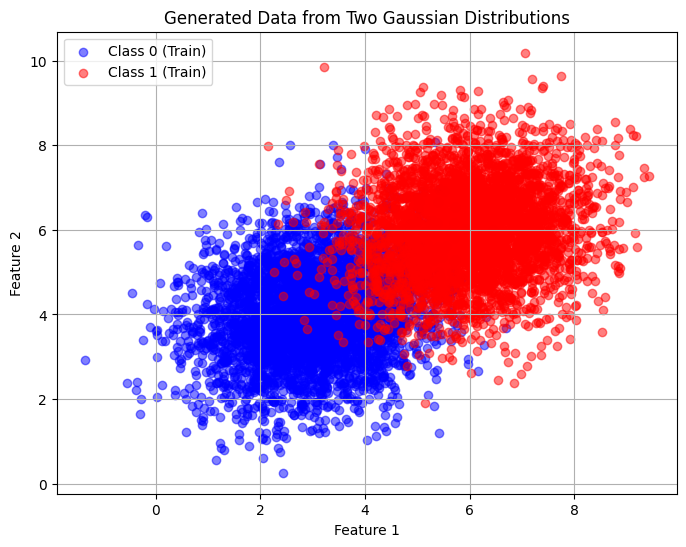

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate 5000 points from two different 2D Gaussian distributions

mean1 = [3, 4]  # Class 0
cov1 = [[1.2, 0.2], [0.2, 1.2]]  # Covariance matrix for Class 0

mean2 = [6, 6]  # Class 1
cov2 = [[1.2, 0.1], [0.1, 1.2]]  # Covariance matrix for Class 1

# Generate 5000 points from each distribution
X1 = np.random.multivariate_normal(mean1, cov1, 5000)  # Class 0 points
X2 = np.random.multivariate_normal(mean2, cov2, 5000)  # Class 1 points

# Step 2: Create the final data matrix X (10000 x 2) and label vector y (10000 elements)
X = np.vstack((X1, X2))  # Stack the two datasets on top of each other
y = np.hstack((np.zeros(5000), np.ones(5000)))  # Create labels: 0 for Class 0, 1 for Class 1

# Step 3: Randomly partition the data into training and test sets
# Create a boolean mask to randomly assign 80% of the data to the training set
mask = np.random.rand(len(y)) < 0.8

# Training set
X_train = X[mask]
y_train = y[mask]

# Test set
X_test = X[~mask]
y_test = y[~mask]

# Optional: Plot the data to visualize the distributions and overlap
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='Class 0 (Train)', alpha=0.5)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', label='Class 1 (Train)', alpha=0.5)
#plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='cyan', label='Class 0 (Test)', alpha=0.5, edgecolor='k')
#plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='magenta', label='Class 1 (Test)', alpha=0.5, edgecolor='k')
plt.legend()
plt.title("Generated Data from Two Gaussian Distributions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


Accuracy of k-NN (k=3): 0.9264


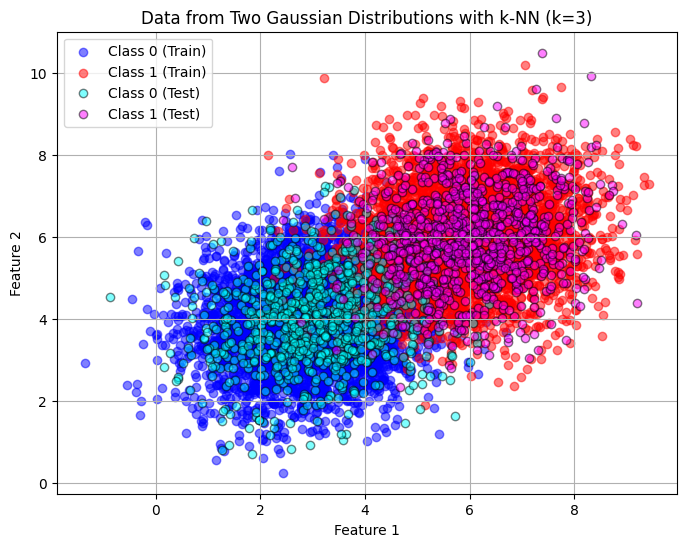

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate 5000 points from two different 2D Gaussian distributions

mean1 = [3, 4]  # Class 0
cov1 = [[1.2, 0.2], [0.2, 1.2]]  # Covariance matrix for Class 0

mean2 = [6, 6]  # Class 1
cov2 = [[1.2, 0.1], [0.1, 1.2]]  # Covariance matrix for Class 1

# Generate 5000 points from each distribution
X1 = np.random.multivariate_normal(mean1, cov1, 5000)  # Class 0 points
X2 = np.random.multivariate_normal(mean2, cov2, 5000)  # Class 1 points

# Step 2: Create the final data matrix X (10000 x 2) and label vector y (10000 elements)
X = np.vstack((X1, X2))  # Stack the two datasets on top of each other
y = np.hstack((np.zeros(5000), np.ones(5000)))  # Create labels: 0 for Class 0, 1 for Class 1

# Step 3: Randomly partition the data into training and test sets
# Create a boolean mask to randomly assign 80% of the data to the training set
mask = np.random.rand(len(y)) < 0.8

# Training set
X_train = X[mask]
y_train = y[mask]

# Test set
X_test = X[~mask]
y_test = y[~mask]

# Step 4: Implement the k-NN classifier
def knn_classifier(X_train, y_train, X_test, k=3):
    y_pred = []

    for test_point in X_test:
        # Calculate Euclidean distance between test_point and all points in the training set
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))

        # Find the indices of the k-nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]

        # Extract the labels of the k-nearest neighbors
        k_nearest_labels = y_train[k_nearest_indices]

        # Perform a majority vote to determine the predicted label
        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]

        y_pred.append(most_common_label)

    return np.array(y_pred)

# Step 5: Make predictions using the k-NN classifier with k=3
k = 3
y_pred = knn_classifier(X_train, y_train, X_test, k)

# Step 6: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of k-NN (k={k}): {accuracy:.4f}")

# Optional: Visualize the training and test data with the classifier's decision regions
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='Class 0 (Train)', alpha=0.5)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', label='Class 1 (Train)', alpha=0.5)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='cyan', label='Class 0 (Test)', alpha=0.5, edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='magenta', label='Class 1 (Test)', alpha=0.5, edgecolor='k')
plt.legend()
plt.title(f"Data from Two Gaussian Distributions with k-NN (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

**3. Linear Classifier**

***3.1. Compute β using the Training Data***

In [ ]:
import numpy as np

# Compute β
X_train_T = X_train.T
beta = np.linalg.inv(X_train_T @ X_train) @ X_train_T @ y_train


***3.2. Classify the Test Data***

In [ ]:
# Compute predictions for test set
predictions = X_test @ beta
y_pred = (predictions >= 0.5).astype(int)


***3.3. Compute Classification Accuracy***

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")


Classification Accuracy: 88.32%


***3.4. Prepare Data for Plotting***
Separate the correctly and incorrectly classified test data points for plotting.

In [ ]:
# Find correctly classified and misclassified points
correct_class0 = X_test[(y_test == 0) & (y_pred == 0)]
correct_class1 = X_test[(y_test == 1) & (y_pred == 1)]
incorrect_class0 = X_test[(y_test == 0) & (y_pred == 1)]
incorrect_class1 = X_test[(y_test == 1) & (y_pred == 0)]

***3.5. Plot the Results***

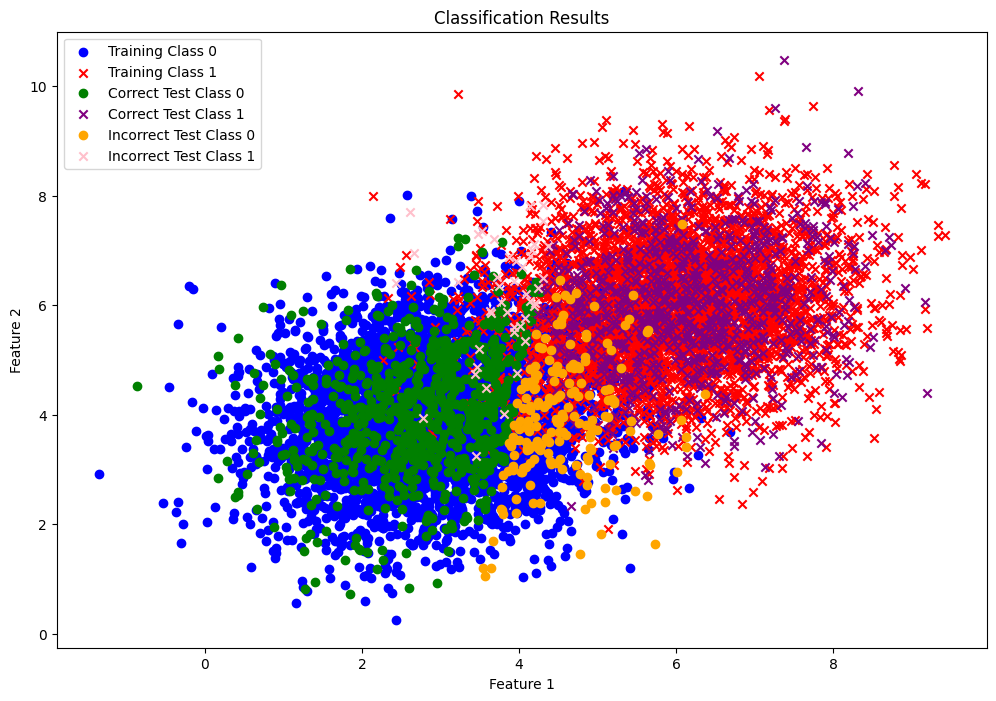

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Training Class 0', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Training Class 1', marker='x')
plt.scatter(correct_class0[:, 0], correct_class0[:, 1], color='green', label='Correct Test Class 0', marker='o')
plt.scatter(correct_class1[:, 0], correct_class1[:, 1], color='purple', label='Correct Test Class 1', marker='x')
plt.scatter(incorrect_class0[:, 0], incorrect_class0[:, 1], color='orange', label='Incorrect Test Class 0', marker='o')
plt.scatter(incorrect_class1[:, 0], incorrect_class1[:, 1], color='pink', label='Incorrect Test Class 1', marker='x')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Results')
plt.legend()
plt.show()


**4. Nearest neighbors classification**

***4.1. Construct the kD Tree***

In [ ]:
from scipy.spatial import cKDTree

# Construct the kD tree from the training set
kdtree = cKDTree(X_train)

***4.2. Classify Test Data Using Nearest Neighbors***

In [ ]:
# Query the kD tree for nearest neighbors
distances, indices = kdtree.query(X_test, k=1)  # k=1 for nearest neighbor

# Predict labels based on nearest neighbor
y_pred_knn = y_train[indices.flatten()]


***4.3. Compute Classification Accuracy***

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Classification Accuracy (k-NN): {accuracy_knn * 100:.2f}%")


Classification Accuracy (k-NN): 90.22%


***4.4 Prepare Data for Plotting***

In [ ]:
# Find correctly classified and misclassified points
correct_class0_knn = X_test[(y_test == 0) & (y_pred_knn == 0)]
correct_class1_knn = X_test[(y_test == 1) & (y_pred_knn == 1)]
incorrect_class0_knn = X_test[(y_test == 0) & (y_pred_knn == 1)]
incorrect_class1_knn = X_test[(y_test == 1) & (y_pred_knn == 0)]


***4.5. Plot the Results***

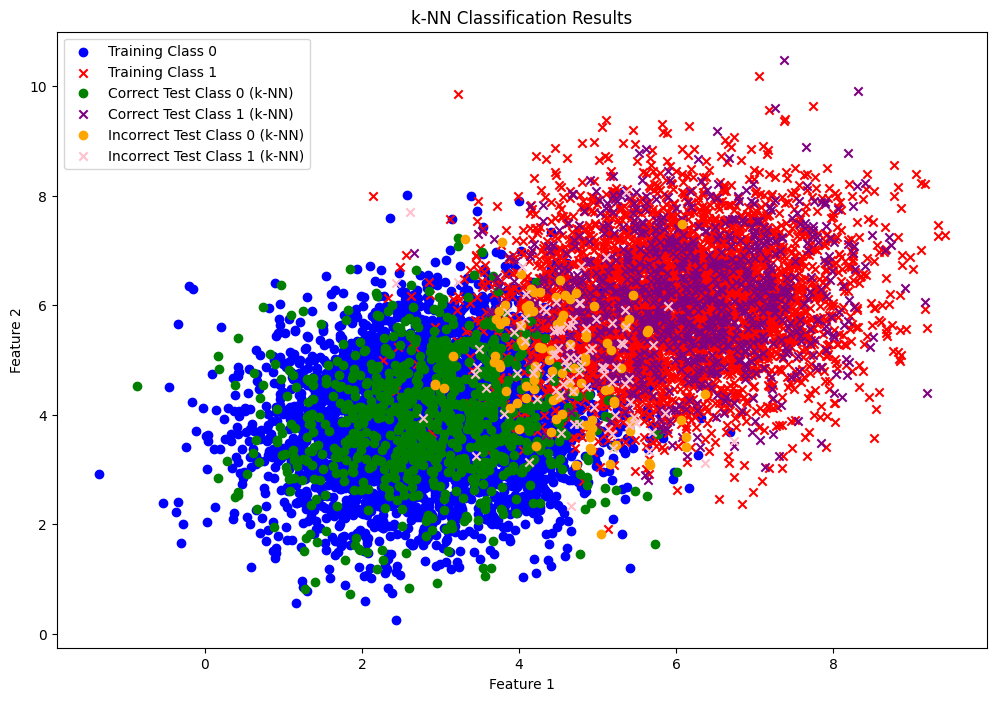

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Training Class 0', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Training Class 1', marker='x')
plt.scatter(correct_class0_knn[:, 0], correct_class0_knn[:, 1], color='green', label='Correct Test Class 0 (k-NN)', marker='o')
plt.scatter(correct_class1_knn[:, 0], correct_class1_knn[:, 1], color='purple', label='Correct Test Class 1 (k-NN)', marker='x')
plt.scatter(incorrect_class0_knn[:, 0], incorrect_class0_knn[:, 1], color='orange', label='Incorrect Test Class 0 (k-NN)', marker='o')
plt.scatter(incorrect_class1_knn[:, 0], incorrect_class1_knn[:, 1], color='pink', label='Incorrect Test Class 1 (k-NN)', marker='x')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-NN Classification Results')
plt.legend()
plt.show()


**5. Data Generation**

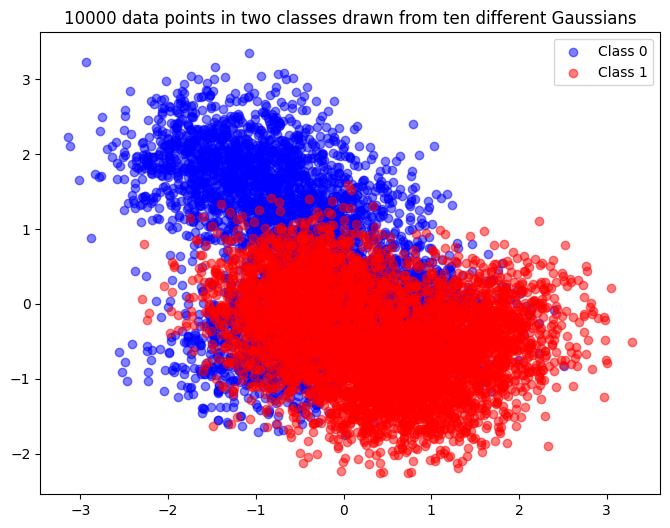

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Parameters
n_samples_per_distribution = 1000  # 1000 samples per Gaussian distribution
n_distributions_per_class = 5  # 5 Gaussians per class
n_features = 2  # 2D data
n_classes = 2  # Two classes

def generate_overlapping_gaussians(n_distributions, n_samples_per_distribution, class_label):
    data = []
    labels = []

    # Define random but overlapping means for each distribution
    centers = np.random.randn(n_distributions, n_features) * 3  # Spread out centers for overlap
    cov = np.array([[1.5, 0], [0, 1.5]])  # Slightly larger covariance to make clusters overlap

    for i in range(n_distributions):
        X = np.random.multivariate_normal(centers[i], cov, n_samples_per_distribution)
        y = np.full(n_samples_per_distribution, class_label)
        data.append(X)
        labels.append(y)

    data = np.vstack(data)
    labels = np.hstack(labels)

    return data, labels

# Generate data for both classes
data_class_0, labels_class_0 = generate_overlapping_gaussians(n_distributions_per_class, n_samples_per_distribution, 0)
data_class_1, labels_class_1 = generate_overlapping_gaussians(n_distributions_per_class, n_samples_per_distribution, 1)

# Combine class data
data = np.vstack((data_class_0, data_class_1))
labels = np.hstack((labels_class_0, labels_class_1))

# Shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data, labels = data[indices], labels[indices]

# Standardize features
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Plot the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], color='blue', alpha=0.5, label='Class 0')
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], color='red', alpha=0.5, label='Class 1')
plt.title('10000 data points in two classes drawn from ten different Gaussians')
plt.legend()
plt.show()


**Linear Regression**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Train the linear classifier (Logistic Regression)
clf_linear = LogisticRegression()
clf_linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = clf_linear.predict(X_test)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f'Linear Classification Accuracy: {accuracy_linear:.2f}')


Linear Classification Accuracy: 0.68


**KNN Classifier**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Train the k-NN classifier (k=5 neighbors)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = clf_knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'k-NN Classification Accuracy: {accuracy_knn:.2f}')

k-NN Classification Accuracy: 0.71


**Plotting**

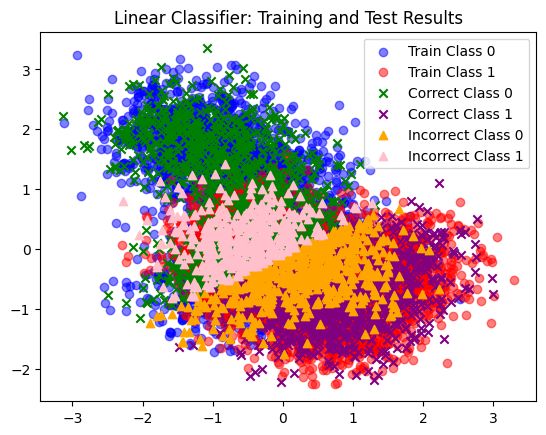

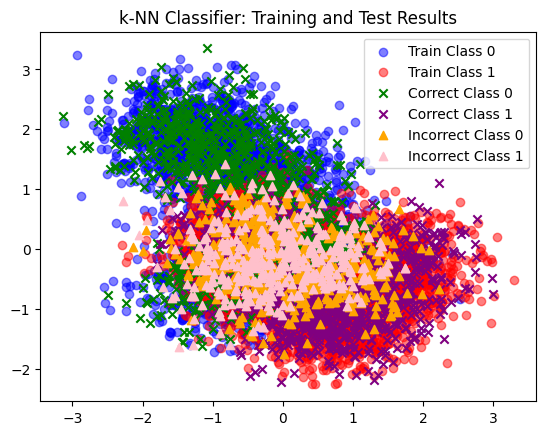

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_classification_results(clf, X_train, y_train, X_test, y_test, title):
    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Separate correctly and incorrectly classified test samples
    correct_class_0 = (y_test == 0) & (y_pred == 0)
    correct_class_1 = (y_test == 1) & (y_pred == 1)
    incorrect_class_0 = (y_test == 0) & (y_pred != 0)
    incorrect_class_1 = (y_test == 1) & (y_pred != 1)

    # Plot the training set
    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', marker='o', alpha=0.5, label='Train Class 0')
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', marker='o', alpha=0.5, label='Train Class 1')

    # Plot correctly classified test set elements
    plt.scatter(X_test[correct_class_0][:, 0], X_test[correct_class_0][:, 1], color='green', marker='x', label='Correct Class 0')
    plt.scatter(X_test[correct_class_1][:, 0], X_test[correct_class_1][:, 1], color='purple', marker='x', label='Correct Class 1')

    # Plot incorrectly classified test set elements
    plt.scatter(X_test[incorrect_class_0][:, 0], X_test[incorrect_class_0][:, 1], color='orange', marker='^', label='Incorrect Class 0')
    plt.scatter(X_test[incorrect_class_1][:, 0], X_test[incorrect_class_1][:, 1], color='pink', marker='^', label='Incorrect Class 1')

    # Format the plot
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Plot for Linear Classifier (Logistic Regression)
plot_classification_results(clf_linear, X_train, y_train, X_test, y_test, 'Linear Classifier: Training and Test Results')

# Plot for k-NN Classifier
plot_classification_results(clf_knn, X_train, y_train, X_test, y_test, 'k-NN Classifier: Training and Test Results')
